# SUMMARY:

* Used FFIEC HMDA API to download datasets from 2022 to 2024.

* Assured data consistency, then combined/concatenated the datasets into one.
    - Raw data combined: 39,892,783 rows

* Selected records needed using 'loan_purpose' feature.
    - Data kept:
        - 'loan_purpose' = 1: home purchase
    - Data removed: (removal count: 18,858,918)
        - 'loan_purpose' = 2: home improvement
        - 'loan_purpose' = 31: refinancing
        - 'loan_purpose' = 32: cash-out refinancing
        - 'loan_purpose' = 4: Other purpose
        - 'loan_purpose' = 5: Not applicable

* Grouped records into approved or denied outcome using 'action_taken' feature:
    - Label 1/Approved: 
        - 'action_taken'=[
            - 1: Loan Originated, 
            - 2: Application approved but not accepted, 
            - 8: Preapproval request approved but not accepted
        ]
    - Label 0/Denied: 
        - 'action_taken' = [
            - 3: Application denied,
            - 7: Preapproval request denied
        ]
    - Data removed: (removal count: 6,552,226)
        - 'action_taken' = [
            - 4: Application withdrawn by applicant,
            - 5: File closed for incompleteness,
            - 6: Purchased loan (from another institution/secondary market)
        ]

* Result:
    - Raw data (data) size: 39,892,783 rows x 99 columns (size: 15.09 GB, memory usage: 29.4+ GB)
    - Total rows removed: 18,858,918 + 6,552,226 = 25,411,144 rows
    - Final data (df) size: 14,481,639 rows x 99 columns (size: 5.58 GB, memory usage: 10.7+ GB)

* Next Step:
    - Final data (df) is written to csv file "df_trimmed.csv" in Step 2 Folder

<br>

<hr>
<hr>

In [2]:
import requests
from io import StringIO
import pandas as pd


In [3]:
headers = {"User-Agent": "Mozilla/5.0"}

url_2022 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2022&loan_purpose=1"
url_2023 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2023&loan_purpose=1"
url_2024 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2024&loan_purpose=1"

In [5]:
# Warning: estimate run time ~ 4-5 minutes
response_2022 = requests.get(url_2022, headers=headers)
data_2022 = pd.read_csv(StringIO(response_2022.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_68373/1161859129.py:3: DtypeWarning: Columns (3,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv(StringIO(response_2022.text))


In [6]:
# Warning: estimate run time ~ 4-5 minutes
response_2023 = requests.get(url_2023, headers=headers)
data_2023 = pd.read_csv(StringIO(response_2023.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_68373/4058700906.py:3: DtypeWarning: Columns (5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023 = pd.read_csv(StringIO(response_2023.text))


In [7]:
# Warning: estimate run time ~ 4-5 minutes
response_2024 = requests.get(url_2024, headers=headers)
data_2024 = pd.read_csv(StringIO(response_2024.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_68373/2677715087.py:3: DtypeWarning: Columns (5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2024 = pd.read_csv(StringIO(response_2024.text))


In [8]:
print(data_2022.shape)
print(data_2023.shape)
print(data_2024.shape)

(16099307, 99)
(11564178, 99)
(12229298, 99)


In [9]:
if data_2022.columns.equals(data_2023.columns) and data_2022.columns.equals(data_2024.columns):
    print("Columns match across all years.")
else:
    print("Column mismatch detected!")

Columns match across all years.


In [10]:
data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)
data.shape

(39892783, 99)

In [11]:
data.shape

(39892783, 99)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39892783 entries, 0 to 39892782
Data columns (total 99 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa-md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              object 
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  purchaser_type                            int64  
 14  

In [13]:
data['loan_purpose'].value_counts()

loan_purpose
1     21033865
32     6526426
31     4228661
4      4014477
2      3941155
5       148199
Name: count, dtype: int64

- 1 - Home purchase
- 2 - Home improvement
- 31 - Refinancing
- 32 - Cash-out refinancing
- 4 - Other purpose
- 5 - Not applicable

In [14]:
data_homePurchase = data[data["loan_purpose"] == 1]

In [32]:
row_removed_A = data.shape[0] - data_homePurchase.shape[0]
print(f"Rows removed: {row_removed_A:,}")

Rows removed: 18,858,918


In [33]:
data_homePurchase.shape

(21033865, 99)

<Axes: xlabel='action_taken'>

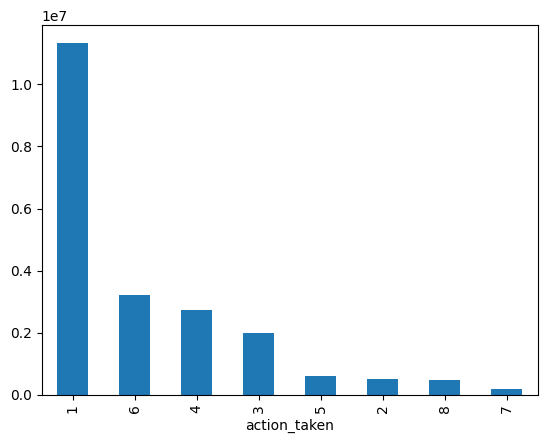

In [17]:
data_homePurchase['action_taken'].value_counts().plot(kind='bar')

**Values:**
- 1: Loan originated
- 2: Application approved but not accepted
- 3: Application denied
- 4: Application withdrawn by applicant
- 5: File closed for incompleteness
- 6: Purchased loan
- 7: Preapproval request denied
- 8: Preapproval request approved but not accepted

**Values will be grouped as:**
- 1,2,8: Approved
- 3,7: Denied

**Values to be removed:**
- 4, 5, 6

In [19]:
approved_data_homePurchase = data_homePurchase[(data_homePurchase['action_taken'] == 1) | (data_homePurchase['action_taken'] == 2) | (data_homePurchase['action_taken'] == 8)]
denied_data_homePurchase = data_homePurchase[(data_homePurchase['action_taken'] == 3) | (data_homePurchase['action_taken'] == 7)]

In [20]:
print(approved_data_homePurchase.shape)
print(denied_data_homePurchase.shape)

(12323579, 99)
(2158060, 99)


In [23]:
df = pd.concat([approved_data_homePurchase, denied_data_homePurchase], ignore_index=True)
print(df.shape)
# verify
print(approved_data_homePurchase.shape[0] + denied_data_homePurchase.shape[0])

(14481639, 99)
14481639


In [31]:
# Amout of rows removed because of application incompleteness, withdrawal, or other reasons
row_removed_B = data_homePurchase.shape[0] - df.shape[0]
print(f"Rows removed: {row_removed_B:,}")

Rows removed: 6,552,226


In [34]:
print(f"Total rows removed: {row_removed_A + row_removed_B:}")

Total rows removed: 25411144


In [26]:
df.head()

activity_year                   lei  derived_msa-md state_code  \
0           2022  254900ACUWEGW702BR80           35614         NY   
1           2022  254900ACUWEGW702BR80           35614         NY   
2           2022  254900ACUWEGW702BR80           35154         NJ   
3           2022  254900ACUWEGW702BR80           35154         NJ   
4           2022  254900ACUWEGW702BR80           35004         NY   

   county_code   census_tract conforming_loan_limit derived_loan_product_type  \
0      36061.0  36061016002.0                     C   Conventional:First Lien   
1      36081.0  36081071100.0                     C   Conventional:First Lien   
2      34025.0  34025806400.0                     C   Conventional:First Lien   
3      34029.0  34029715501.0                     C   Conventional:First Lien   
4      36059.0  36059411000.0                     C   Conventional:First Lien   

              derived_dwelling_category       derived_ethnicity  ...  \
0  Single Family (1-4 Units):Site-Built  Not Hispanic or Latino  ...   
1  Single Family (1-4 Units):Site-Built  Not Hispanic or Latino  ...   
2  Single Family (1-4 Units):Site-Built  Not Hispanic or Latino  ...   
3  Single Family (1-4 Units):Site-Built  Not Hispanic or Latino  ...   
4  Single Family (1-4 Units):Site-Built  Not Hispanic or Latino  ...   

  denial_reason-2 denial_reason-3  denial_reason-4  tract_population  \
0             NaN             NaN              NaN              3607   
1             NaN             NaN              NaN              5687   
2             NaN             NaN              NaN              5135   
3             NaN             NaN              NaN              4939   
4             NaN             NaN              NaN              6132   

   tract_minority_population_percent  ffiec_msa_md_median_family_income  \
0                              36.57                              99000   
1                              55.57                              99000   
2                              19.57                             128300   
3                               7.90                             128300   
4                              68.15                             146400   

   tract_to_msa_income_percentage  tract_owner_occupied_units  \
0                          152.12                         440   
1                          132.73                        1769   
2                          102.28                        1416   
3                           62.91                         685   
4                           63.34                        1073   

   tract_one_to_four_family_homes  tract_median_age_of_housing_units  
0                              55                                  0  
1                             597                                 65  
2                            1679                                 53  
3                             997                                 40  
4                            1708                                 69  

[5 rows x 99 columns]

In [27]:
df.shape

(14481639, 99)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14481639 entries, 0 to 14481638
Data columns (total 99 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa-md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              object 
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  purchaser_type                            int64  
 14  

# Result:

* Write the result data (df) to 'df_trimmed.csv' in Step 2 Folder ready for EDA

In [35]:
df.to_csv('../Step 2/df_trimmed.csv', index=False)